# Example for Interval Fuzzy C Means

In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering, IntervalFuzzyCMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram
from interClusLib.evaluation import SilhouetteScore
random_data = IntervalData.make_interval_blobs(n_samples=10000, n_clusters=4, n_dims = 5)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
      Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0           -4.191965        -0.794028         3.514699         6.330807   
1           11.658553        12.848062         3.171622         5.802222   
2            4.339337         8.084355       -10.620471       -10.520471   
3            7.292565         7.392565         1.553922         5.710928   
4            9.104111         9.734986        -1.673353         2.534123   
...               ...              ...              ...              ...   
9995        12.060189        12.160189         1.230756         4.206820   
9996        10.507122        10.607122         5.114960         6.598902   
9997        10.761856        11.254696         3.814392         5.005944   
9998         6.518685         8.689650         4.443250         4.993230   
9999         6.767401         6.978894        -1.519064         4.184644   

      Feature_3_lower  Feature_3_upper  Feature_4_lower  Featur

In [2]:
hmodel = IntervalFuzzyCMeans(n_clusters=4,
    m=2.0,
    max_iter=100,
    adaptive_weights=True,  # IFCMADC模式
    random_state=42)
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

Starting Fuzzy C-Means with 10000 samples, 4 clusters...
Iteration 10: objective = 214756.447005, membership change = 0.538773
Iteration 20: objective = 156610.041460, membership change = 0.019469
Iteration 30: objective = 116231.323635, membership change = 0.073710
Converged after 40 iterations
Final objective: 112630.741368
[3 2 1 ... 2 2 0]


In [3]:
score = SilhouetteScore.silhouette_score(random_data.get_intervals(), hmodel.labels_, metric='euclidean')

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

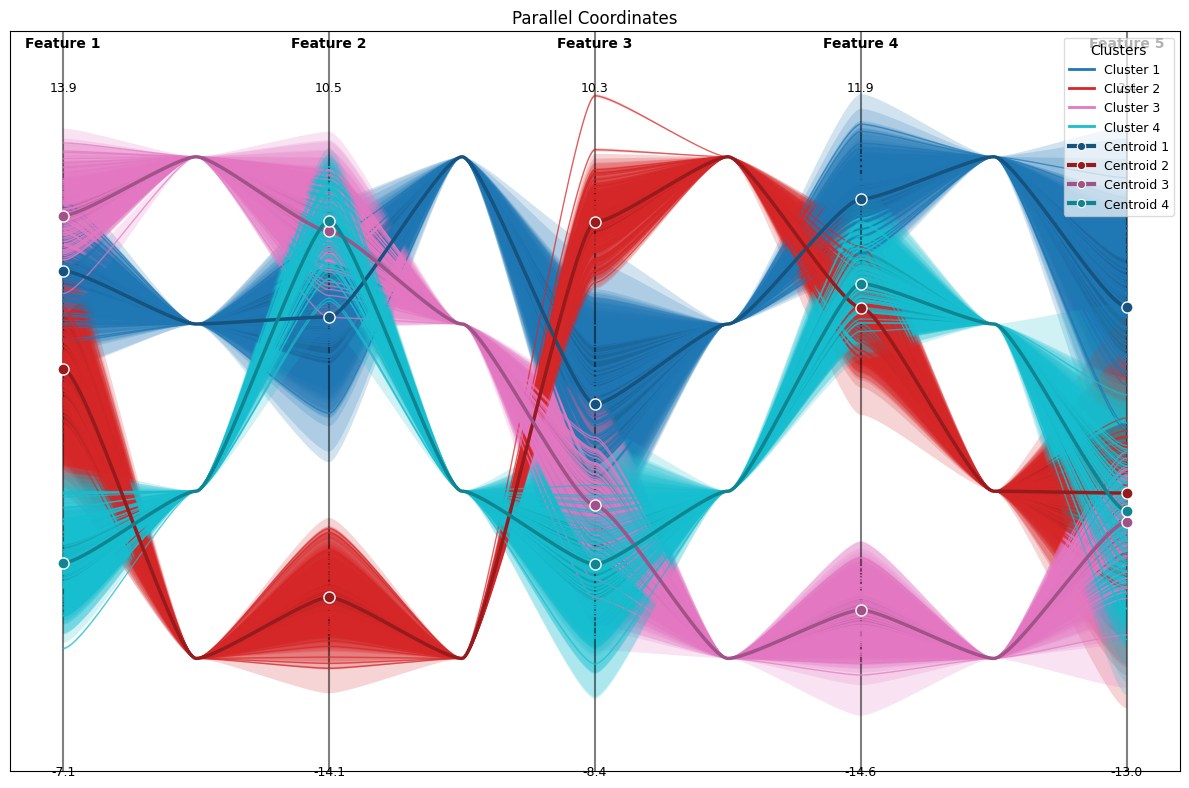

In [4]:
IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True,
                                      max_samples_per_cluster=100)